In [631]:
#Importing required libraries
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt 
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import DiscriminationThreshold
from sklearn.metrics import plot_precision_recall_curve

In [632]:
Airbnb= pd.read_csv("train.csv")   #Reading the dataset and visualizing the data heads
Airbnb.head()                      #and visualizing the data heads

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [633]:
#Printing the rows and columns and finding the total number of null values
#shape is a tuple that always gives dimensions of the array. 
#The shape is a tuple that gives you an indication of the no. of dimensions in the array.
print("Row     : ", Airbnb.shape[0])     
print("Columns : ", Airbnb.shape[1])
print("nFEatures :\n", Airbnb.columns.tolist())
print("nMissing values : ", Airbnb.isnull().sum().values.sum())
print("\nUnique values : \n", Airbnb.nunique())

Row     :  74111
Columns :  29
nFEatures :
 ['id', 'log_price', 'property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since', 'instant_bookable', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds']
nMissing values :  83752

Unique values : 
 id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_veri

# Data Manipulation

In [634]:
Airbnb.info()   #To find the variable types in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

# Data preprocessing

In [635]:
Airbnb.duplicated().sum()#Duplicating the dataset
Airbnb.drop_duplicates(inplace=True)  #Return DataFrame with duplicate rows removed.

In [636]:
Airbnb.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [637]:
Airbnb.drop(['name','id','last_review','zipcode'], axis=1, inplace=True) #To remove variables that are not needed for operation

In [638]:
#Visualization the revised dataset
Airbnb.head(5) 

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,...,2012-03-26,f,40.696524,-73.991617,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,...,2017-06-19,t,40.766115,-73.989040,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,2016-10-25,t,40.808110,-73.943756,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,...,2015-04-19,f,37.772004,-122.431619,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,...,2015-03-01,t,38.925627,-77.034596,Columbia Heights,4,40.0,NaN,0.0,1.0


In [639]:
Airbnb.isnull().sum()
Airbnb.dropna(how='any',inplace=True)
Airbnb.info() #to find the summary of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38791 entries, 1 to 74110
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               38791 non-null  float64
 1   property_type           38791 non-null  object 
 2   room_type               38791 non-null  object 
 3   amenities               38791 non-null  object 
 4   accommodates            38791 non-null  int64  
 5   bathrooms               38791 non-null  float64
 6   bed_type                38791 non-null  object 
 7   cancellation_policy     38791 non-null  object 
 8   cleaning_fee            38791 non-null  bool   
 9   city                    38791 non-null  object 
 10  description             38791 non-null  object 
 11  first_review            38791 non-null  object 
 12  host_has_profile_pic    38791 non-null  object 
 13  host_identity_verified  38791 non-null  object 
 14  host_response_rate      38791 non-null

In [640]:
Airbnb.describe() #To obtain the descriptive view of every column
#describe() method computes and displays summary statistics for a Python dataframe.

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,38791.000000,38791.000000,38791.000000,38791.000000,38791.000000,38791.000000,38791.000000,38791.000000,38791.000000
mean,4.746586,3.235209,1.215011,38.770000,-90.825476,32.908793,94.339022,1.252816,1.760176
std,0.658676,2.139116,0.550901,3.002329,21.435097,45.357460,6.867280,0.837347,1.288135
min,0.000000,1.000000,0.000000,33.705835,-122.511500,1.000000,20.000000,0.000000,0.000000
25%,4.304065,2.000000,1.000000,34.189461,-118.325342,5.000000,92.000000,1.000000,1.000000
50%,4.700480,2.000000,1.000000,40.683014,-74.001117,15.000000,96.000000,1.000000,1.000000
75%,5.164786,4.000000,1.000000,40.760427,-73.949178,42.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,8.000000,42.390437,-71.000462,542.000000,100.000000,10.000000,18.000000


In [641]:
#To identify the different columns
Airbnb.columns 

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'latitude', 'longitude', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       'bedrooms', 'beds'],
      dtype='object')

In [642]:
#import required libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [643]:
Airbnb.drop(['description','first_review','host_since','amenities','latitude','longitude','neighbourhood','thumbnail_url'], axis=1, inplace=True)
#examing the changes
Airbnb.head(5)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,t,10,92.0,1.0,3.0
5,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,t,t,100%,t,3,100.0,1.0,1.0
7,4.787492,Condominium,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,t,t,100%,f,9,93.0,1.0,1.0
8,4.787492,House,Private room,2,1.0,Real Bed,moderate,True,SF,t,f,100%,f,159,99.0,1.0,1.0


In [644]:
#Encoding the above columns and factorizing them into categories
def Encode(Airbnb):
    for column in Airbnb.columns[Airbnb.columns.isin([ 'room_type','cancellation_policy','property_type','bed_type','host_response_rate','host_has_profile_pic','host_identity_verified','instant_bookable','city','cleaning_fee'])]:
        Airbnb[column] = Airbnb[column].factorize()[0]
    return Airbnb

Airbnb_en = Encode(Airbnb.copy())      

In [645]:
Airbnb_en.head(15) 

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
1,5.129899,0,0,7,1.0,0,0,0,0,0,0,0,0,6,93.0,3.0,3.0
2,4.976734,0,0,5,1.0,0,1,0,0,0,1,0,0,10,92.0,1.0,3.0
5,4.442651,0,1,2,1.0,0,0,0,1,0,1,0,0,3,100.0,1.0,1.0
7,4.787492,1,0,2,1.0,0,1,0,2,0,1,0,1,9,93.0,1.0,1.0
8,4.787492,2,1,2,1.0,0,1,0,1,0,0,0,1,159,99.0,1.0,1.0
10,4.605170,0,1,2,1.0,0,0,0,0,0,1,0,1,82,93.0,1.0,1.0
17,4.595120,3,1,2,2.0,0,0,0,3,0,1,0,1,12,88.0,1.0,1.0
19,4.595120,2,0,8,1.0,0,0,0,0,0,0,0,0,5,72.0,3.0,3.0
20,4.382027,2,1,2,1.0,0,0,0,2,0,1,0,1,26,98.0,1.0,1.0
21,3.688879,2,1,2,1.5,0,0,0,0,0,1,0,1,57,89.0,1.0,1.0


In [646]:
x = Airbnb_en.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = Airbnb_en['log_price']

#Splitting into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353) 
x_train.head()
y_train.head()

55861    3.912023
21480    4.605170
60142    5.010635
53770    4.941642
20399    5.342334
Name: log_price, dtype: float64

In [647]:
x_train.shape

(34911, 15)

# Decision Tree Regression

In [648]:
#Modelling the decision tree
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)  
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.5306850378566401

In [649]:
disp = plot_confusion_matrix(DTree,x_test,y_test, cmap='Blues', values_format='.3g')

ValueError: plot_confusion_matrix only supports classifiers

In [650]:
print(classification_report(y_test, y_predict))

ValueError: continuous is not supported

In [651]:
plot_precision_recall_curve(DTree, x_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeRegressor

# Random Forest

In [652]:
#Reading the dataset into df
df =  pd.read_csv("train.csv")         
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [653]:
for column in df.columns:
  if (df[column].dtype) == 'object' and column != 'zipcode' and column != 'neighbourhood':  
    print(column,"\n--------------------------")
    print(df[column].unique())
    print("\n------------------------------") 

property_type 
--------------------------
['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']

------------------------------
room_type 
--------------------------
['Entire home/apt' 'Private room' 'Shared room']

------------------------------
amenities 
--------------------------
['{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Essentials,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'
 '{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,Shampoo,Hangers,"Hair dryer",Iron,"translation missing: en.hosting_amenity_50"}'

In [654]:
#Bar plot
def bar_plot_object(title,df):
  x = list(df.value_counts().keys())
  x = x[::-1]
  y = list(df.value_counts())                 
  y = y[::-1]
  plt.barh(x,y)
  plt.title(title)
  return None

In [655]:
#Histogram of the columns
def explore_col(column):
  bar_plot_object(column+" histogram",df[column])
  print(column,'description\n', df[column].describe())
  print('Top 5 frequent:',df[column].value_counts()[:5].index.tolist()) 

In [656]:
def pie_col(column):
  df[column].value_counts().plot.pie(autopct='%1.0f%%')

property_type description
 count         74111
unique           35
top       Apartment
freq          49003
Name: property_type, dtype: object
Top 5 frequent: ['Apartment', 'House', 'Condominium', 'Townhouse', 'Loft']


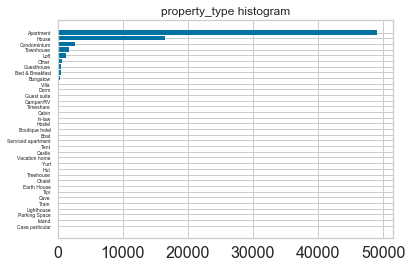

In [657]:
#Plot of property type
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 5
import matplotlib as mpl                         
mpl.rcParams['font.size'] = 16
explore_col('property_type')

room_type description
 count               74111
unique                  3
top       Entire home/apt
freq                41310
Name: room_type, dtype: object
Top 5 frequent: ['Entire home/apt', 'Private room', 'Shared room']


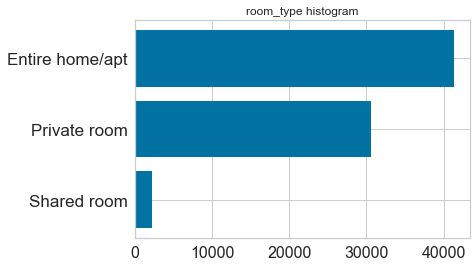

In [658]:
#Plotting room type
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 17
explore_col('room_type')                           

bed_type description
 count        74111
unique           5
top       Real Bed
freq         72028
Name: bed_type, dtype: object
Top 5 frequent: ['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch']


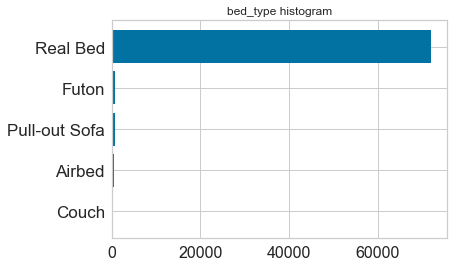

In [659]:
#Plotting bed type
explore_col('bed_type')          

beds description
 count    73980.000000
mean         1.710868
std          1.254142
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         18.000000
Name: beds, dtype: float64
Top 5 frequent: [1.0, 2.0, 3.0, 4.0, 5.0]


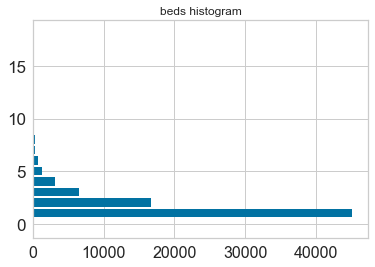

In [660]:
explore_col('beds')

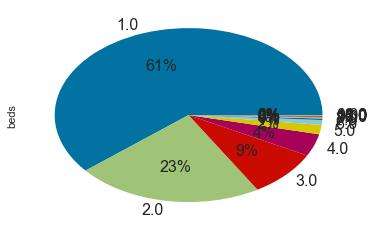

In [661]:
pie_col('beds')

cleaning_fee description
 count     74111
unique        2
top        True
freq      54403
Name: cleaning_fee, dtype: object
Top 5 frequent: [True, False]


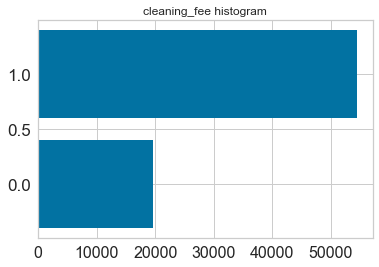

In [662]:
explore_col('cleaning_fee')

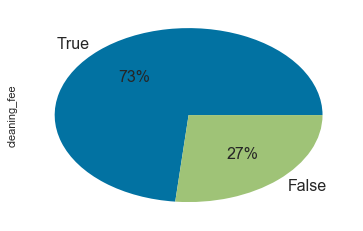

In [663]:
pie_col('cleaning_fee') 

cancellation_policy description
 count      74111
unique         5
top       strict
freq       32374
Name: cancellation_policy, dtype: object
Top 5 frequent: ['strict', 'flexible', 'moderate', 'super_strict_30', 'super_strict_60']


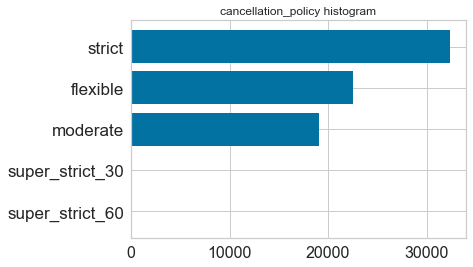

In [664]:
#Plotting cancellation policy
explore_col('cancellation_policy')           

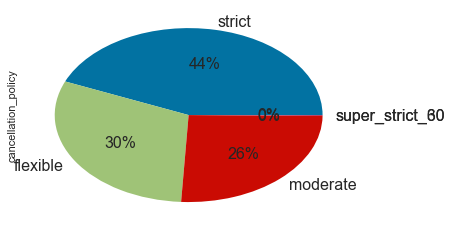

In [665]:
#Plot pie chart for cancellation policy
pie_col('cancellation_policy')        

In [666]:
#Describing the dataset
df.describe()         

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


accommodates description
 count    74111.000000
mean         3.155146
std          2.153589
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64
Top 5 frequent: [2, 4, 1, 3, 6]


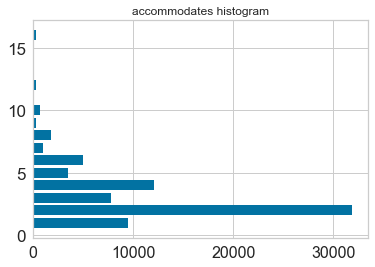

In [667]:
explore_col('accommodates')

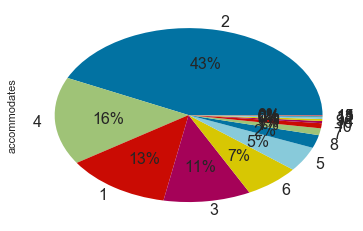

In [668]:
pie_col('accommodates')

In [669]:
#Variable types
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [670]:
#To identify null values
df.isnull().sum()  

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [671]:
#Dropping columns not required
data2 = df.drop(['id','description','first_review','last_review','host_since','host_has_profile_pic','name','thumbnail_url','zipcode','neighbourhood'],axis=1)
data2.columns         

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_identity_verified', 'host_response_rate', 'instant_bookable',
       'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

In [672]:
#Info of revised dataset
data2.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               73911 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  73923 non-null  object 
 11  host_response_rate      55812 non-null  object 
 12  instant_bookable        74111 non-null  object 
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [673]:
#Mean of the columns
data2.bathrooms = data2.bathrooms.fillna(int(data2.bathrooms.mean()))        
data2.bedrooms = data2.bedrooms.fillna(int(data2.bedrooms.mean()))
data2.beds = data2.beds.fillna(int(data2.beds.mean()))
data2.review_scores_rating = data2.review_scores_rating.fillna(data2.review_scores_rating.mean())

In [674]:
data2.host_response_rate = data2.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x)
data2.host_response_rate = data2.host_response_rate.fillna(data2.host_response_rate.mean())

In [675]:
data2.host_identity_verified = data2.host_identity_verified.apply(lambda x: True if x=='t' else False)

In [676]:
data2.instant_bookable = data2.instant_bookable.apply(lambda x: True if x=='t' else False)

In [677]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   amenities               74111 non-null  object 
 4   accommodates            74111 non-null  int64  
 5   bathrooms               74111 non-null  float64
 6   bed_type                74111 non-null  object 
 7   cancellation_policy     74111 non-null  object 
 8   cleaning_fee            74111 non-null  bool   
 9   city                    74111 non-null  object 
 10  host_identity_verified  74111 non-null  bool   
 11  host_response_rate      74111 non-null  float64
 12  instant_bookable        74111 non-null  bool   
 13  latitude                74111 non-null  float64
 14  longitude               74111 non-null

In [678]:
#Identifying unique objects in a data column
data2.room_type.unique() 

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [679]:
#Dropping columns not required
data2 = data2.drop(['city','latitude','longitude','amenities'],axis=1)        

In [680]:
#Viewing the revised dataset
data2.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74111 non-null  float64
 1   property_type           74111 non-null  object 
 2   room_type               74111 non-null  object 
 3   accommodates            74111 non-null  int64  
 4   bathrooms               74111 non-null  float64
 5   bed_type                74111 non-null  object 
 6   cancellation_policy     74111 non-null  object 
 7   cleaning_fee            74111 non-null  bool   
 8   host_identity_verified  74111 non-null  bool   
 9   host_response_rate      74111 non-null  float64
 10  instant_bookable        74111 non-null  bool   
 11  number_of_reviews       74111 non-null  int64  
 12  review_scores_rating    74111 non-null  float64
 13  bedrooms                74111 non-null  float64
 14  beds                    74111 non-null

In [681]:
#Viewing the scores
data2.review_scores_rating = data2.review_scores_rating/100      

In [682]:
#To identify the correlation
data2.corr()       

,log_price,accommodates,bathrooms,cleaning_fee,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.000000,0.567574,0.355174,0.111191,0.024325,-0.005748,-0.044271,-0.032470,0.074822,0.473028,0.441953
accommodates,0.567574,1.000000,0.505490,0.182306,0.058898,0.043242,0.053093,0.041964,-0.015006,0.709214,0.810247
bathrooms,0.355174,0.505490,1.000000,0.054134,0.015748,0.006170,0.001912,-0.041521,0.009162,0.589783,0.525699
cleaning_fee,0.111191,0.182306,0.054134,1.000000,0.161898,0.093006,0.010031,0.110204,0.028085,0.105491,0.132089
host_identity_verified,0.024325,0.058898,0.015748,0.161898,1.000000,0.069387,-0.087141,0.161823,0.046500,0.026562,0.036972
host_response_rate,-0.005748,0.043242,0.006170,0.093006,0.069387,1.000000,0.091710,0.117549,0.061340,0.018562,0.038661
instant_bookable,-0.044271,0.053093,0.001912,0.010031,-0.087141,0.091710,1.000000,0.077276,-0.061013,-0.003586,0.051320
number_of_reviews,-0.032470,0.041964,-0.041521,0.110204,0.161823,0.117549,0.077276,1.000000,0.011179,-0.035192,0.031540
review_scores_rating,0.074822,-0.015006,0.009162,0.028085,0.046500,0.061340,-0.061013,0.011179,1.000000,0.009729,-0.023958
bedrooms,0.473028,0.709214,0.589783,0.105491,0.026562,0.018562,-0.003586,-0.035192,0.009729,1.000000,0.709186


In [683]:
#To visualize the heat map
import plotly.figure_factory as ff         
corrs = data2.corr()
figure = ff.create_annotated_heatmap(              
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [684]:
#To find the contribution of each type of property
property_types = data2.property_type.unique()       
for pt in property_types:
  s = data2.property_type == pt
  print('Support of',pt,np.sum(s)/len(s))

Support of Apartment 0.661210886373143
Support of House 0.22278744046093021
Support of Condominium 0.03586512123706333
Support of Loft 0.01678563236226741
Support of Townhouse 0.022830618936460174
Support of Hostel 0.0009445291522176195
Support of Guest suite 0.0016596726531823887
Support of Bed & Breakfast 0.0062338924046362884
Support of Bungalow 0.004938538138737839
Support of Guesthouse 0.006719650254348207
Support of Dorm 0.0019160448516414568
Support of Other 0.008190417077087071
Support of Camper/RV 0.0012683677186922319
Support of Villa 0.002415295974956484
Support of Boutique hotel 0.0009310358786145107
Support of Timeshare 0.0010389820674393815
Support of In-law 0.0009580224258207284
Support of Boat 0.0008770627842020753
Support of Serviced apartment 0.00028335874566528586
Support of Castle 0.00017541255684041507
Support of Cabin 0.0009715156994238373
Support of Treehouse 9.445291522176195e-05
Support of Tipi 4.047982080932655e-05
Support of Vacation home 0.000148426009634197

In [685]:
#Factorizing required columns
def Encode(data2):        
    for column in data2.columns[data2.columns.isin([ 'room_type','cancellation_policy','property_type','bed_type','host_response_rate','host_has_profile_pic','host_identity_verified','instant_bookable','city','cleaning_fee'])]:
        data2[column] = data2[column].factorize()[0]
    return data2

data2_en = Encode(data2.copy())

In [686]:
#Redefining
pp_data = data2_en      

In [687]:
#Importing required models and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
train, val  = train_test_split(pp_data, test_size=0.2)        
X_train = train.drop(['log_price'], axis=1)
#X_train = scaler.fit_transform(X_train)
y_train = train.log_price
X_val = val.drop(['log_price'], axis=1)
#X_val = scaler.transform(X_val) 
y_val = val.log_price

In [688]:
def analysis(model, X_train, X_test, y_train, y_test):  
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

In [689]:
#Modelling 
from sklearn import metrics
from scipy import stats         

def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

# Modelling random forest


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.36,0.23,0.48,0.1,0.094,0.56,0.61


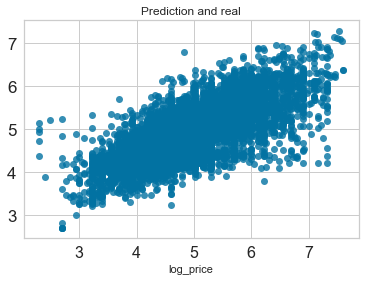

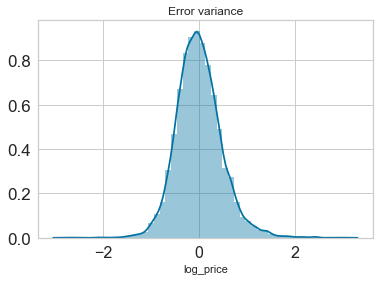

In [690]:
from sklearn.ensemble import RandomForestRegressor #Import required estimator
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          n_estimators = 10
)
rfm.fit(X_train, y_train)
analysis(
    model = rfm, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val
)


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.36,0.23,0.48,0.1,0.094,0.56,0.61


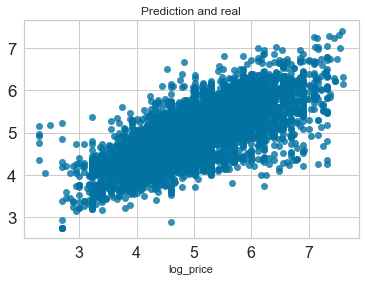

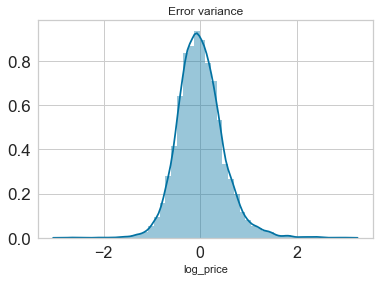

Feature: 0, Score: 0.00909
Feature: 1, Score: 0.75845
Feature: 2, Score: 0.02226
Feature: 3, Score: 0.10620
Feature: 4, Score: 0.00637
Feature: 5, Score: 0.00728
Feature: 6, Score: 0.00976
Feature: 7, Score: 0.00513
Feature: 8, Score: 0.00915
Feature: 9, Score: 0.00667
Feature: 10, Score: 0.01137
Feature: 11, Score: 0.00802
Feature: 12, Score: 0.03417
Feature: 13, Score: 0.00607


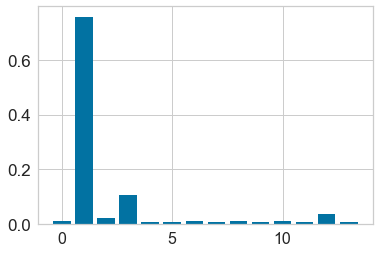

In [691]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from matplotlib import pyplot
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          n_estimators = 10
)
rfm.fit(X_train, y_train)
analysis(
    model = rfm, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val
)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [692]:
#def plot_importance(importance,names,model_type):
        #Create arrays from feature importance and feature names:
       ## feature_importance = np.array(importance)
        #feature_names = np.array(names)

        #Create a DataFrame using a Dictionary:
        #data={'feature_names':feature_names,'feature_importance':feature_importance}
         #fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance:
        #fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot:
        #plt.figure(figsize=(10,8))
        #Plot Searborn bar chart:
        #sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels:
        ##plt.title(model_type + 'FEATURE IMPORTANCE')
        #plt.xlabel('FEATURE IMPORTANCE')
        #plt.ylabel('FEATURE NAMES')
        
#plot_importance(X_train.feature_importance,X_train.columns,'RANDOM FOREST')
#plot_importance() 

In [693]:
y_pred = rfm.predict(x_test)

ValueError: X has 15 features, but RandomForestRegressor is expecting 14 features as input.

In [694]:
plot_precision_recall_curve(rfm, x_test, y_test)

ValueError: Expected 'estimator' to be a binary classifier, but got RandomForestRegressor

# XGBOOST


In [695]:
#pip install xgboost
import xgboost as xgb                               #Importing xgboost
from xgboost import plot_importance
from sklearn.metrics import  mean_squared_error, r2_score


In [696]:
model = xgb.XGBRegressor()           #redefining into a model

In [697]:
model.fit(X_train, y_train)          #Fitting the model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [698]:
pred_train = model.predict(X_train)

In [699]:
pred_val = model.predict(X_val)

In [700]:
print("\nTraining MSE:", round(mean_squared_error(y_train, pred_train),4))       #To find the training and validation MSE and r2
print("Validation MSE:", round(mean_squared_error(y_val, pred_val),4))      
print("\nTraining r2:", round(r2_score(y_train, pred_train),4))
print("Validation r2:", round(r2_score(y_val, pred_val),4))


Training MSE: 0.1908
Validation MSE: 0.2201

Training r2: 0.6282
Validation r2: 0.5769


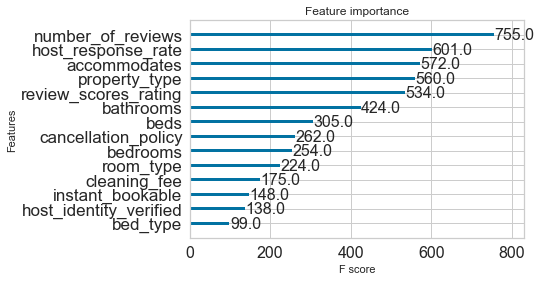

In [701]:
plot_importance(model)      #To plot the feature importance of the model

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.36,0.22,0.47,0.098,0.091,0.58,0.63


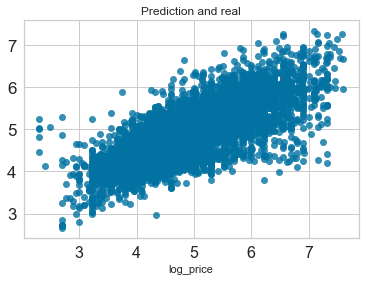

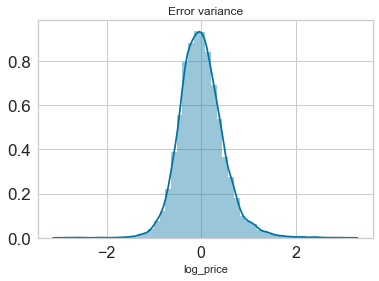

In [702]:
#Visualizing different plots
analysis(
    model = model, 
    X_train = X_train,
    X_test = X_val,
    y_train = y_train,
    y_test =  y_val                   
)

In [703]:
plot_precision_recall_curve(model, y_train, y_test)

ValueError: Expected 'estimator' to be a binary classifier, but got XGBRegressor

# Logistic Regression

In [704]:
from sklearn.model_selection import train_test_split       #Required libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
#from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
#from yellowbrick.classifier import DiscriminationThreshold

In [705]:
df1 =  pd.read_csv("train.csv")
df1.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [706]:
len(df1.columns)     #To identify the length of the columns

29

In [707]:
df1.shape      #To identify the size of the dataset

(74111, 29)

In [708]:
for col in df1:                          #To find any null values present in the dataset
    if (df1[col].isnull().any()):
        print(col)

bathrooms
first_review
host_has_profile_pic
host_identity_verified
host_response_rate
host_since
last_review
neighbourhood
review_scores_rating
thumbnail_url
zipcode
bedrooms
beds


In [709]:
df1=df1.fillna(0)

In [710]:
df1.describe()        #To describe the revised dataset

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,1.126662e+07,4.782069,3.155146,1.231929,38.445958,-92.397525,20.900568,72.842520,1.264239,1.707844
std,6.081735e+06,0.717394,2.153589,0.584780,3.080167,21.705322,37.828641,39.920507,0.852773,1.255092
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


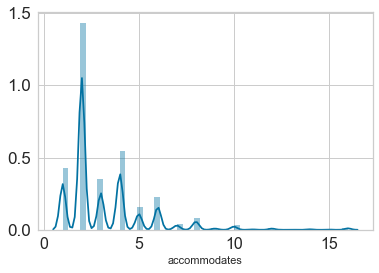

In [711]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']  #To identify and plot the numeric data
numericdata = df1.select_dtypes(include=numerics)
x= numericdata['accommodates']
sns.distplot(x);

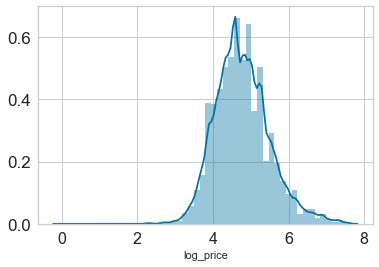

In [712]:
x= numericdata.iloc[:,1]          #To plot the density against the log price
sns.distplot(x);

In [713]:
df1

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,0.0,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,0.0,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [714]:
df1.drop(['name','id','last_review','zipcode','description','first_review','host_since','amenities','latitude','longitude','neighbourhood','thumbnail_url'], axis=1, inplace=True)
#Dropping columns not required

In [715]:
df1.head() #Identifying the data after columns dropped

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,t,t,0,f,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,t,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,t,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,4,1.0,Real Bed,flexible,True,SF,t,t,0,f,0,0.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,t,4,40.0,0.0,1.0


In [716]:
def Encode(df1):
    for column in df1.columns[df1.columns.isin([ 'room_type','cancellation_policy','property_type','bed_type','host_response_rate','host_has_profile_pic','host_identity_verified','instant_bookable','city','cleaning_fee'])]:
        df1[column] = df1[column].factorize()[0]
    return df1

df2 = Encode(df1.copy())       #Factorizing requried columns

In [717]:
df2

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,3,1.0,0,0,0,0,0,0,0,0,2,100.0,1.0,1.0
1,5.129899,0,0,7,1.0,0,0,0,0,0,1,1,1,6,93.0,3.0,3.0
2,4.976734,0,0,5,1.0,0,1,0,0,0,0,1,1,10,92.0,1.0,3.0
3,6.620073,1,0,4,1.0,0,2,0,1,0,0,0,0,0,0.0,2.0,2.0
4,4.744932,0,0,2,1.0,0,1,0,2,0,0,1,1,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,0,1,1,1.0,0,2,1,0,0,0,0,0,0,0.0,1.0,1.0
74107,5.043425,0,0,4,2.0,0,1,0,3,0,1,1,0,16,93.0,2.0,4.0
74108,5.220356,0,0,5,1.0,0,1,0,0,0,0,1,1,43,94.0,2.0,2.0
74109,5.273000,0,0,2,1.0,0,0,0,0,0,1,1,1,0,0.0,0.0,2.0


In [718]:
mean_log= np.mean(df2['log_price'])        # to allocate the mean of log price into mean log

In [719]:
classificationData= df2

In [720]:
classificationData.loc[ classificationData['log_price'] <= mean_log, 'log_price'] = 0 #Classifying the data

In [721]:
classificationData.loc[ classificationData['log_price'] > mean_log, 'log_price'] = 1

In [722]:
classificationDataY= classificationData['log_price']
classificationDataX=classificationData.drop(['log_price'],axis=1)

In [723]:
from sklearn.linear_model import LogisticRegression

In [724]:
from sklearn.model_selection import train_test_split     #Data splitting
X_train, X_test, y_train, y_test = train_test_split(classificationDataX, classificationDataY, test_size = 0.2,random_state=0)

In [725]:
classifier= LogisticRegression()

In [726]:
classifier.fit(X_train,y_train)       #Fitting model

LogisticRegression()

In [727]:
y_pred = classifier.predict(X_test)  #To achieve the regression accuracy
print('Logistic regression accuracy: {:.2f}'.format(classifier.score(X_test, y_test)))

Logistic regression accuracy: 0.79


In [728]:
from sklearn.metrics import confusion_matrix #To achieve the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5949 1646]
 [1395 5833]]


In [729]:
from sklearn.metrics import classification_report   #To observe the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      7595
         1.0       0.78      0.81      0.79      7228

    accuracy                           0.79     14823
   macro avg       0.79      0.80      0.79     14823
weighted avg       0.80      0.79      0.79     14823



In [730]:
from sklearn.metrics import roc_auc_score        #To achieve the roc curve
from sklearn.metrics import roc_curve

def rocAucCurve(classifier):
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

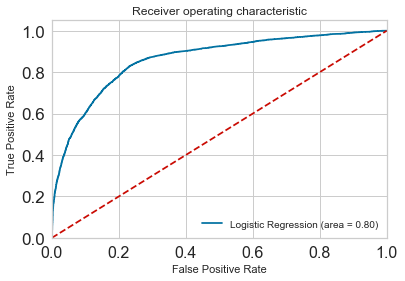

In [731]:
rocAucCurve(classifier)

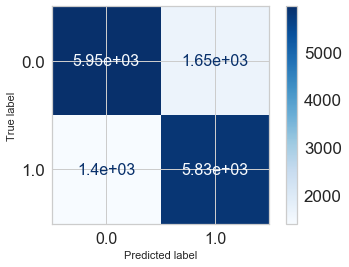

In [732]:
disp = plot_confusion_matrix(classifier,X_test,y_test, cmap='Blues', values_format='.3g')

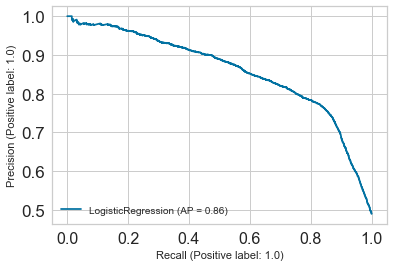

In [733]:
plot_precision_recall_curve(classifier, X_test, y_test)

In [734]:
from sklearn.model_selection import GridSearchCV

In [735]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 200, 300]
    }
]

## Gradient Boosting Classifier

In [736]:
from sklearn.ensemble import GradientBoostingClassifier  #Importing 

In [737]:
gb = GradientBoostingClassifier()       #Fitting the model
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [738]:
y_pred = gb.predict(X_test) 

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      7595
         1.0       0.81      0.80      0.81      7228

    accuracy                           0.81     14823
   macro avg       0.81      0.81      0.81     14823
weighted avg       0.81      0.81      0.81     14823



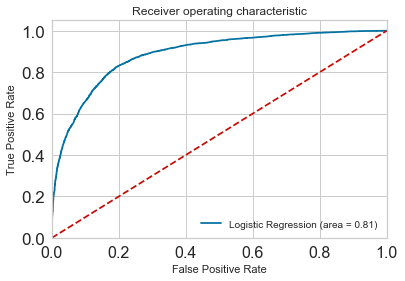

In [739]:
print(classification_report(y_test, y_pred))  #Printing the classification report
rocAucCurve(gb) 

In [740]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]   #To find the learning rates
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.747
Accuracy score (validation): 0.744

Learning rate:  0.1
Accuracy score (training): 0.751
Accuracy score (validation): 0.749

Learning rate:  0.25
Accuracy score (training): 0.768
Accuracy score (validation): 0.769

Learning rate:  0.5
Accuracy score (training): 0.798
Accuracy score (validation): 0.797

Learning rate:  0.75
Accuracy score (training): 0.798
Accuracy score (validation): 0.802

Learning rate:  1
Accuracy score (training): 0.804
Accuracy score (validation): 0.802



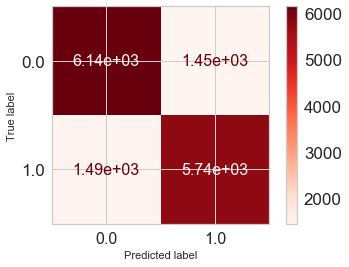

In [741]:
disp = plot_confusion_matrix(gb,X_test,y_test, cmap='Reds', values_format='.3g')

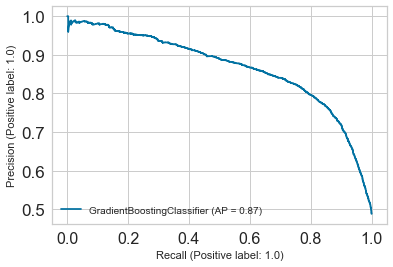

In [742]:
plot_precision_recall_curve(gb, X_test, y_test)

# Support Vector Machine

In [743]:
airbnb2 =  pd.read_csv("train.csv")
airbnb2.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [744]:
airbnb2.drop(['name','id','last_review','zipcode','description','first_review','host_since','amenities','latitude','longitude','neighbourhood','thumbnail_url'], axis=1, inplace=True)
#Dropping columns not required

In [745]:
def Encode(airbnb2):
    for column in airbnb2.columns[airbnb2.columns.isin([ 'room_type','cancellation_policy','property_type','bed_type','host_response_rate','host_has_profile_pic','host_identity_verified','instant_bookable','city','cleaning_fee'])]:
        airbnb2[column] = airbnb2[column].factorize()[0]
    return airbnb2

airbnb2 = Encode(airbnb2.copy())

In [746]:
airbnb2['room_type'].unique() #Identifying the unique objects into categories of  room type column

array([0, 1, 2], dtype=int64)

In [747]:
airbnb2['cancellation_policy'].unique() 

array([0, 1, 2, 3, 4], dtype=int64)

In [748]:
airbnb2.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,3,1.0,0,0,0,0,0,0,-1,0,2,100.0,1.0,1.0
1,5.129899,0,0,7,1.0,0,0,0,0,0,1,0,1,6,93.0,3.0,3.0
2,4.976734,0,0,5,1.0,0,1,0,0,0,0,0,1,10,92.0,1.0,3.0
3,6.620073,1,0,4,1.0,0,2,0,1,0,0,-1,0,0,NaN,2.0,2.0
4,4.744932,0,0,2,1.0,0,1,0,2,0,0,0,1,4,40.0,0.0,1.0


In [749]:
airbnb2.isnull().sum()                   #To find any null vaulues
airbnb2.dropna(how='any',inplace=True)
airbnb2.info() #.info() function is used to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57129 entries, 0 to 74110
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               57129 non-null  float64
 1   property_type           57129 non-null  int64  
 2   room_type               57129 non-null  int64  
 3   accommodates            57129 non-null  int64  
 4   bathrooms               57129 non-null  float64
 5   bed_type                57129 non-null  int64  
 6   cancellation_policy     57129 non-null  int64  
 7   cleaning_fee            57129 non-null  int64  
 8   city                    57129 non-null  int64  
 9   host_has_profile_pic    57129 non-null  int64  
 10  host_identity_verified  57129 non-null  int64  
 11  host_response_rate      57129 non-null  int64  
 12  instant_bookable        57129 non-null  int64  
 13  number_of_reviews       57129 non-null  int64  
 14  review_scores_rating    57129 non-null

In [750]:
airbnb2

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,3,1.0,0,0,0,0,0,0,-1,0,2,100.0,1.0,1.0
1,5.129899,0,0,7,1.0,0,0,0,0,0,1,0,1,6,93.0,3.0,3.0
2,4.976734,0,0,5,1.0,0,1,0,0,0,0,0,1,10,92.0,1.0,3.0
4,4.744932,0,0,2,1.0,0,1,0,2,0,0,0,1,4,40.0,0.0,1.0
5,4.442651,0,1,2,1.0,0,0,0,1,0,0,0,1,3,100.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,0,0,2,1.0,0,0,0,4,0,0,0,0,6,100.0,1.0,1.0
74105,4.248495,1,1,2,1.0,0,1,0,3,0,0,32,0,36,91.0,1.0,1.0
74107,5.043425,0,0,4,2.0,0,1,0,3,0,1,0,0,16,93.0,2.0,4.0
74108,5.220356,0,0,5,1.0,0,1,0,0,0,0,0,1,43,94.0,2.0,2.0


In [751]:
airbnb2['cleaning_fee'].unique()     #Identifying the classification of the cleaning_fee

array([0, 1], dtype=int64)

In [752]:
no_cleaning_fee = airbnb2[airbnb2['cleaning_fee'] == 0]  #Splitting the cleaning fee
yes_cleaning_fee = airbnb2[airbnb2['cleaning_fee'] == 1]

In [753]:
no_cleaning_fee

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,3,1.0,0,0,0,0,0,0,-1,0,2,100.0,1.0,1.0
1,5.129899,0,0,7,1.0,0,0,0,0,0,1,0,1,6,93.0,3.0,3.0
2,4.976734,0,0,5,1.0,0,1,0,0,0,0,0,1,10,92.0,1.0,3.0
4,4.744932,0,0,2,1.0,0,1,0,2,0,0,0,1,4,40.0,0.0,1.0
5,4.442651,0,1,2,1.0,0,0,0,1,0,0,0,1,3,100.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74103,5.135798,0,0,2,1.0,0,1,0,1,0,1,0,0,24,98.0,1.0,1.0
74104,4.356709,0,0,2,1.0,0,0,0,4,0,0,0,0,6,100.0,1.0,1.0
74105,4.248495,1,1,2,1.0,0,1,0,3,0,0,32,0,36,91.0,1.0,1.0
74107,5.043425,0,0,4,2.0,0,1,0,3,0,1,0,0,16,93.0,2.0,4.0


In [754]:
yes_cleaning_fee

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
16,4.317488,3,1,2,1.0,0,0,1,4,0,1,-1,0,15,91.0,1.0,1.0
44,5.783825,0,0,2,1.0,0,2,1,3,0,0,0,1,1,80.0,1.0,1.0
50,4.158883,1,1,2,1.0,0,0,1,4,0,0,0,0,85,96.0,1.0,1.0
83,5.010635,0,1,1,1.0,0,2,1,1,0,1,0,0,1,100.0,1.0,1.0
107,4.007333,0,1,2,1.0,0,2,1,0,0,0,6,0,144,96.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74090,4.317488,1,1,2,1.0,0,2,1,0,0,0,0,0,16,100.0,1.0,1.0
74091,5.010635,0,0,2,1.0,0,1,1,0,0,0,17,0,5,100.0,0.0,1.0
74096,3.912023,0,1,2,1.0,0,2,1,0,0,1,-1,0,2,60.0,1.0,1.0
74102,4.110874,13,2,10,3.0,0,2,1,3,0,1,0,0,1,80.0,1.0,10.0


In [755]:
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [756]:
no_cleaning_fee_downsampled = resample(no_cleaning_fee, replace=False, n_samples=1000, random_state=42) #Downsampling
len(no_cleaning_fee_downsampled)

1000

In [757]:
yes_cleaning_fee_downsampled = resample(yes_cleaning_fee, replace=False, n_samples=1000, random_state=42) #Downsampling
len(yes_cleaning_fee_downsampled)

1000

In [758]:
airbnb2_downsample = pd.concat([no_cleaning_fee_downsampled, yes_cleaning_fee_downsampled]) #Concatenating the downsample data into one
len(airbnb2_downsample)

2000

In [759]:
X = airbnb2_downsample.drop('cleaning_fee', axis=1).copy()
X.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
5141,4.828314,0,0,3,1.0,0,0,0,0,0,-1,1,31,92.0,1.0,1.0
18666,3.526361,0,2,2,1.0,0,1,3,0,0,0,0,28,99.0,1.0,2.0
26461,5.303305,0,0,4,1.5,0,0,1,0,0,0,0,38,99.0,1.0,1.0
53924,4.442651,1,1,5,1.0,0,0,3,0,0,0,0,69,98.0,1.0,3.0
31165,4.828314,8,0,2,1.0,0,1,3,0,0,0,0,130,97.0,0.0,1.0


In [760]:
Y = airbnb2_downsample['cleaning_fee'].copy()
Y.head()

5141     0
18666    0
26461    0
53924    0
31165    0
Name: cleaning_fee, dtype: int64

In [761]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)      #Splitting data

In [762]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [763]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

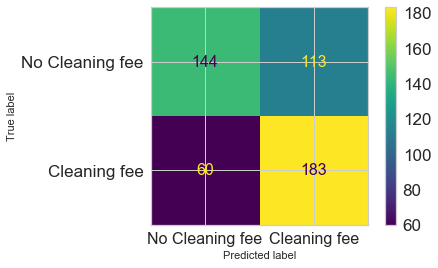

In [764]:
plot_confusion_matrix(clf_svm, X_test_scaled,y_test,values_format='d',display_labels=["No Cleaning fee", "Cleaning fee"])

In [765]:
param_grid = [
    {'C': [0.5, 1 , 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']},
]

In [766]:
optimal_params = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy',verbose=0)

In [767]:
optimal_params.fit(X_train_scaled, y_train)     #Grid search CV

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [768]:
print(optimal_params.best_params_)  #Optimizing the model

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


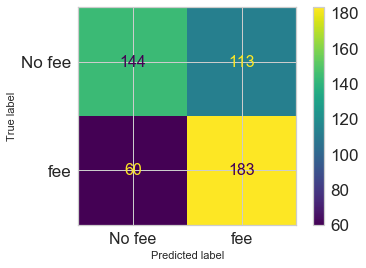

In [769]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=["No fee", "fee"]) #Plotting the confusion matrix


In [770]:
pca = PCA()   #Fitting model 
X_train_pca = pca.fit_transform(X_train_scaled)

In [771]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [772]:
labels= [str(x) for x in range (1, len(per_var)+1)]

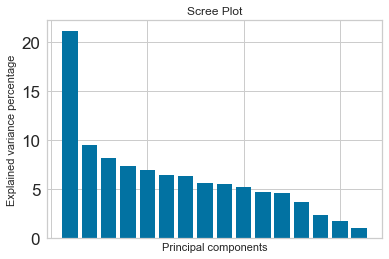

In [773]:
plt.bar(x=range(1,len(per_var)+1), height=per_var)    #PCA plotting
plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Explained variance percentage')
plt.xlabel('Principal components')
plt.title('Scree Plot')
plt.show()

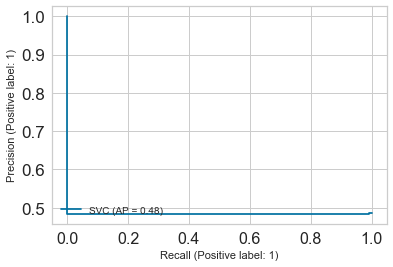

In [774]:
plot_precision_recall_curve(clf_svm, X_test, y_test)

In [775]:
y_pred = clf_svm.predict(X_test)

In [776]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.49      1.00      0.65       243

    accuracy                           0.49       500
   macro avg       0.24      0.50      0.33       500
weighted avg       0.24      0.49      0.32       500



# Comparison of different models

In [777]:
from pandas import DataFrame

In [778]:
d = [0.53,0.61,0.63,0.79,0.80,0.24]
d

[0.53, 0.61, 0.63, 0.79, 0.8, 0.24]

In [779]:
df = DataFrame(data = d)
df

,0
0,0.53
1,0.61
2,0.63
3,0.79
4,0.80
5,0.24


In [780]:
df = DataFrame(data = d, columns = ['Precision scores'])

In [781]:
df

,Precision scores
0,0.53
1,0.61
2,0.63
3,0.79
4,0.80
5,0.24


In [782]:
df = DataFrame({'Decision Tree':[0.53],'Random Forest':[0.61],'XGBOOST':[0.63],'Logistic Regression':[0.79],'Gradient Boosting Classifier':[0.80],'Support Vector Machine':[0.49]})

In [783]:
df

,Decision Tree,Random Forest,XGBOOST,Logistic Regression,Gradient Boosting Classifier,Support Vector Machine
0,0.53,0.61,0.63,0.79,0.8,0.49


In [784]:
#From the above dataframe table it can be noticed that the accuracy score of Gradient Boosting Classifier is the highest with 80%.
#Logistic Regression has the second highest accuracy with 79%.
#XGBOOST has the next highest accuracy with 63%.
#The accuracy of random forest is 61%.
#The decision tree algorithm provides a accuracy of 53%.
#The precision of support vector is lowest with only 49%.